#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

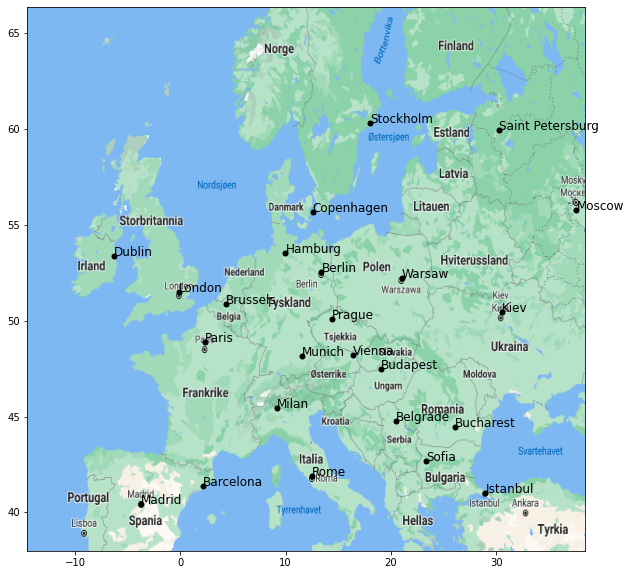

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


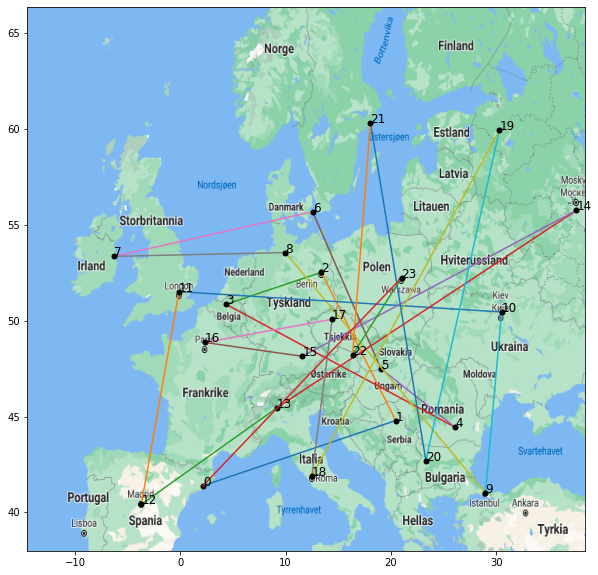

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)



## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

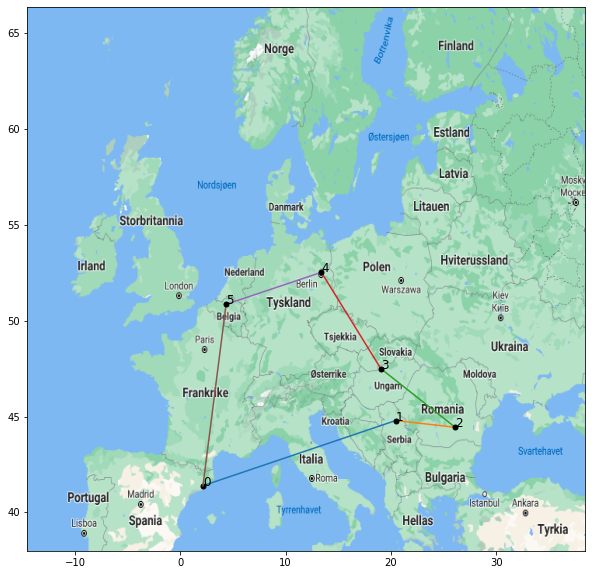

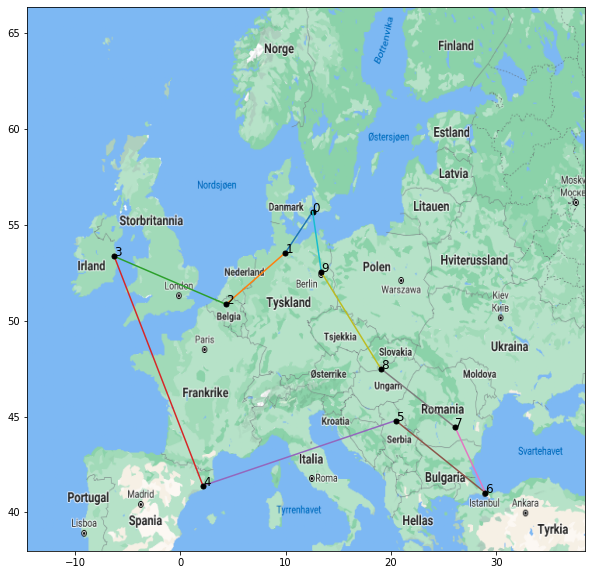

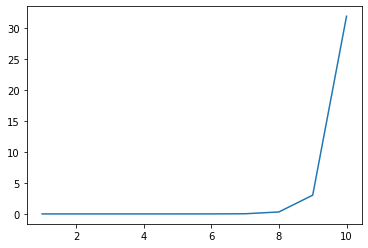

In [8]:
# Implement the algorithm herecities_perms_6 = list(permutations(cities[:6]))

from itertools import permutations
import time

def exhaustive_search(numb_city: int) -> list: 
    cities_number = cities[:numb_city] # A slice to get the amount of cities wanted
    perm_tour = permutations(cities_number) #uses permutations()

    distance = tour_dist(cities_number) #creates a random best distance that gets updated in the for loops.
    best_tour = [] 

    for p in perm_tour: #iterates over all permutations
        new_dist = tour_dist(p)
        if new_dist < distance:
            distance = new_dist
            best_tour = p
    return best_tour #returns the best tour

def time_route(numb_city: int) -> float:
    start = time.time()
    tour_time = exhaustive_search(numb_city)
    end = time.time()
    return end - start 

# A function that finds the distance between two cities 
def dist_cities(cit1: str, cit2: str) -> float:
    index_1 = data[0].index(cit1)+1
    index_2 = data[0].index(cit2)
    dist = data[index_1][index_2]
    return float(dist)


# A function that returns the tour distance for a spesific tour. 
def tour_dist(tour: list) -> float:
    distance = 0

    for i in range(len(tour)-1):
        distance += dist_cities(tour[i], tour[i+1])

    distance += dist_cities(tour[0], tour[len(tour)-1]) #Adding the distance from the last element too the first element

    return float(distance)


six_cities = exhaustive_search(6)
plot_plan(six_cities)


ten_cities = exhaustive_search(10)
plot_plan(ten_cities)




#Checks how long it takes for exhaustive_search on 1 to 10. 
time_list = []
for i in range(1,11):
    time_list.append(time_route(i))

x = np.arange(1,11)
plt.plot(x,time_list)
#y = np.arrange(1,7)







What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

# Answer
The actual sequence of citites that creates the shortest tour is: 

Barcelona -> Dublin -> Brussels -> Hamburg -> Copenhagen -> Berlin -> Budapest -> Bucharest -> Istanbul -> Belgrade -> Barcelona (Repeat)

Shortest tour among the first 10 cities is 7486.3 km . My program used 28.98 s to find it. An approximation for all 24 cities would be 28.98 s* 24! / 10! = 1.71e+17 * 28.98 s (!!!)
 


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

10 cities:
The Standard Deviation of the runs is 943.10 km.
The mean of the runs is 9708.29 km.
The shortest run with the Hill Climbing algorithm for 10 cities is 7780.63
The longest run with Hill Climber algorithm is 11457.81

24 cities:
The Standard Deviation of the runs is 2264.60 km.
The mean of the runs is 27847.20 km.
The shortest run with the Hill Climbing algorithm for 10 cities is 23001.59
The longest run with Hill Climber algorithm is 32133.41


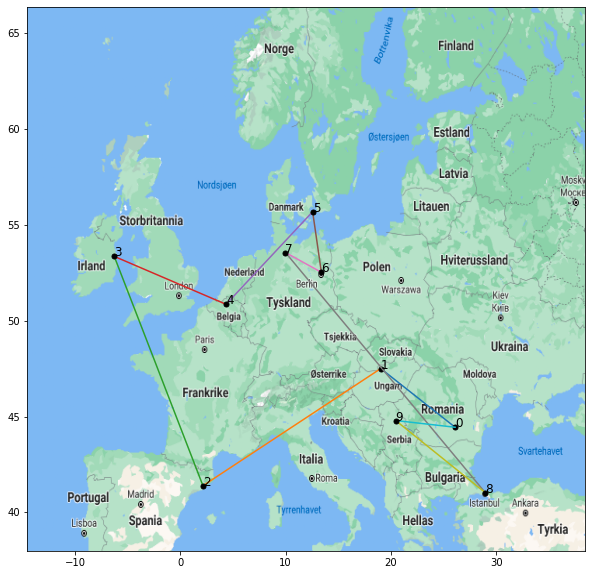

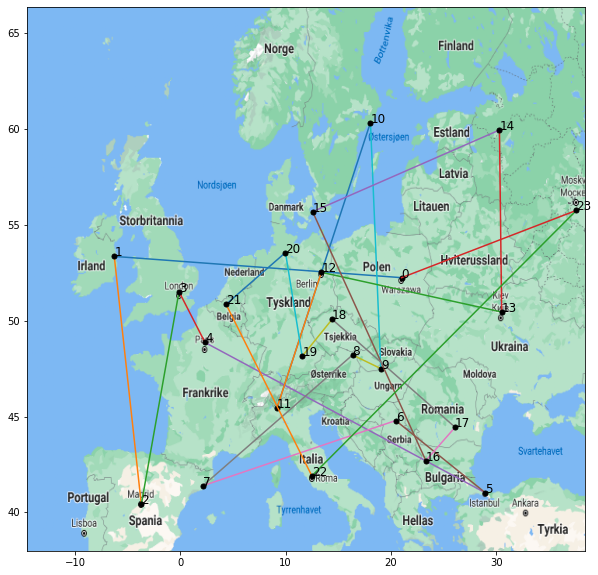

In [9]:
# Implement the algorithm here
import random

def hill_climber(numb_city: int) -> list:
    
    cities_number = cities[:numb_city]
    random.shuffle(cities_number) # use random.shuffle() to get a random start_tour. 

    shortest_distance = tour_dist(cities_number) #random best shortest_distance
    shortest_tour = []

    for i in range(1000):
        rand_index1 = np.random.randint(0,numb_city) #Uses the the np.random.randint() to find to random integers. 
        rand_index2 = np.random.randint(0,numb_city) 

        if rand_index1 != rand_index2:
            temp_tour = cities_number.copy() #Make a copy one can makes changes on. 
            temp_tour[rand_index1] = cities_number[rand_index2] # Switch the two indexes. 
            temp_tour[rand_index2] = cities_number[rand_index1]

            if tour_dist(temp_tour) < shortest_distance: #if the distance is better, switch. 
                shortest_distance = tour_dist(temp_tour)
                shortest_tour = temp_tour
    
    return shortest_tour 



runs_10 = []
runs_24 = []

#
for i in range(20):
    hill_climb_10 = tour_dist(hill_climber(10))
    hill_climb_24 = tour_dist(hill_climber(24))

    runs_10.append(hill_climb_10)
    runs_24.append(hill_climb_24)

#Runs it 20 times, since it is a stochastic algorithn, 



std_10 = np.std(runs_10); mean_10 = np.mean(runs_10)
min_tour_10 = np.min(runs_10); max_tour_10 = np.max(runs_10)

print("10 cities:")
print(f'The Standard Deviation of the runs is {std_10:.2f} km.')
print(f'The mean of the runs is {mean_10:.2f} km.')
print(f'The shortest run with the Hill Climbing algorithm for 10 cities is {min_tour_10:.2f}')
print(f'The longest run with Hill Climber algorithm is {max_tour_10:.2f}')

std_24 = np.std(runs_24)
mean_24 = np.mean(runs_24)
min_tour_24 = np.min(runs_24)
max_tour_24 = np.max(runs_24)

print("\n24 cities:")
print(f'The Standard Deviation of the runs is {std_24:.2f} km.')
print(f'The mean of the runs is {mean_24:.2f} km.')
print(f'The shortest run with the Hill Climbing algorithm for 10 cities is {min_tour_24:.2f}')
print(f'The longest run with Hill Climber algorithm is {max_tour_24:.2f}')


plot_plan(hill_climber(10))
plot_plan(hill_climber(24))

#min_tour_24 = np.min(runs_24)
#plot_plan(min_tour_24)






The Hill Climber algorithm performs worse (naturally), than **Exhaustive Search**. For the first 10 cities, the hill climber algotrithm finds a route with the distance 7780.63. This is 294.3 km longer than the exhaustive search for the first **10 cities**.



**Stats for 10 cities with 20 runs:** 
The Standard Deviation of the runs is 943.10 km.
The mean of the runs is 9708.29 km.
The shortest run with the Hill Climbing algorithm for 10 cities is 7780.63.
The longest run with Hill Climber algorithm is 11457.81.

**Stats for 24 cities with 20 runs:**
The Standard Deviation of the runs is 2264.60 km.
The mean of the runs is 27847.20 km.
The shortest run with the Hill Climbing algorithm for 24 cities is 23001.59.
The longest run with Hill Climber algorithm is 32133.41.

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

Populazion size: 1000
Std: 334.33
Mean: 8584.69
Best: 7887.03
Worst: 9301.66 

Populazion size: 500
Std: 585.77
Mean: 8845.73
Best: 7680.30
Worst: 9738.48 

Populazion size: 100
Std: 702.14
Mean: 9489.73
Best: 8022.57
Worst: 11107.15


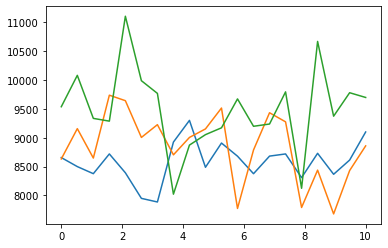

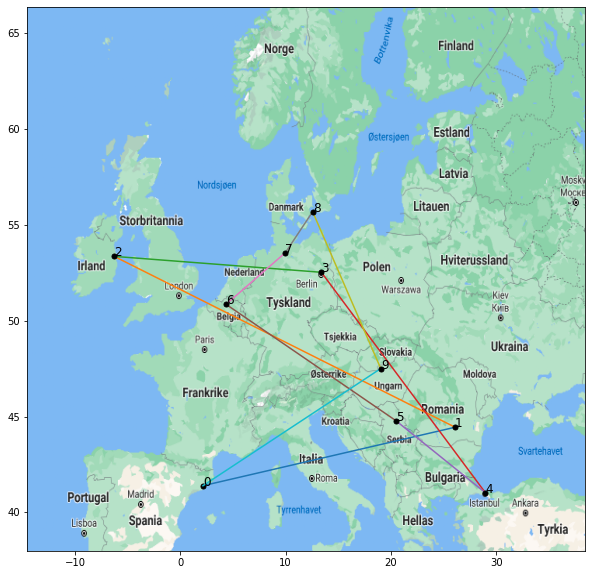

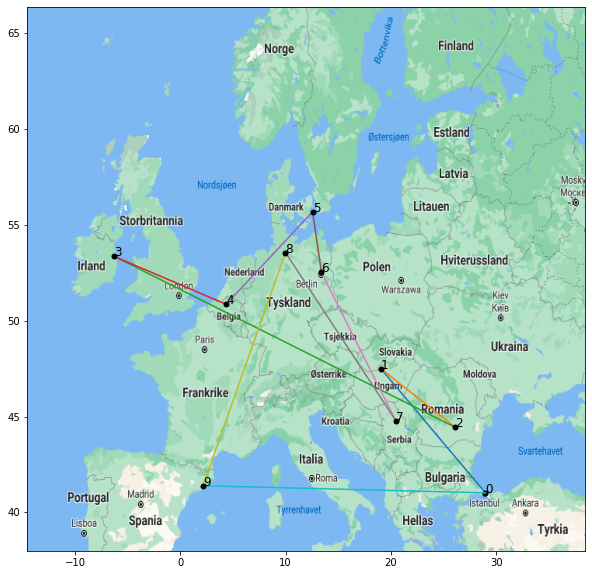

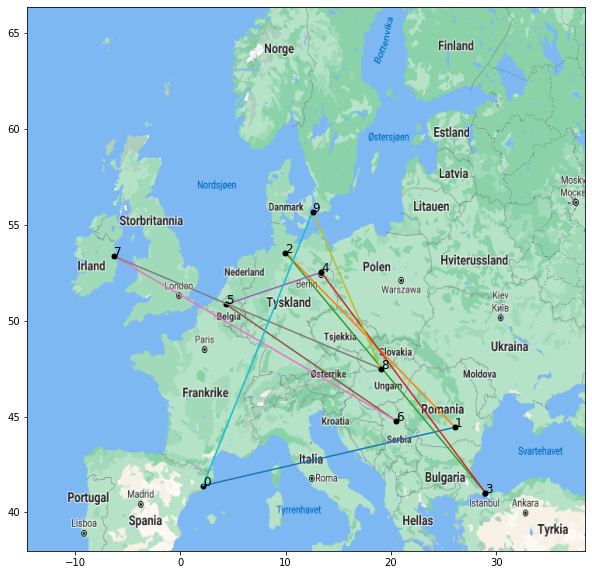

In [19]:
# Implement the algorithm here

from random import shuffle
import numpy as np

def genetic_algorithm(population_size: int, numbers_cities: int) -> list:
    
    cities_number = cities[:numbers_cities]
    population = []
    
    
    for i in range(population_size):
        shuffle(cities_number)
        population.append(cities_number[:]) #Had to use the slice, after using the shuffle() to get the correct list. 
    
    parents = population #The entire population starts as parents. 
    
    for gen in range(6): #iterates 6 generations
        parents = parent_selection(parents) #Chooses parents with parent_selection
        
        offspring = [] 
        for i in range((len(parents))):
            parent_1, parent_2 = random.sample(parents, 2) #Picks two random parents
            child = cycle_crossover_pair(parent_1, parent_2) #Does a cycle crossover for the two parents. 
            child1 = swap_mutation(child[0]) #mutation on the children. 
            child2 = swap_mutation(child[1])
            offspring.append(child1)
            offspring.append(child2)

          
        parents = offspring #The offspring are the new possible parents. 

    
    shortest_tour_distance = 100000 #Arbitrary large distance. 
    shortest_tour_list = []

    for p in parents: #For the last generation, we find the shortes tour. 
        if tour_dist(p) < shortest_tour_distance: 
            shortest_tour_distance = tour_dist(p)
            shortest_tour_list = p
        
    return shortest_tour_distance, p


#Easy parent_selection, tournament selection type selection. 
def parent_selection(population: list) -> list: 
    
    size_population = len(population)
    parents = []

    for i in range(0,size_population,2):
        random_1 = random.randint(0,size_population-1)
        random_2 = random.randint(0,size_population-1)
        
        if tour_dist(population[random_1]) > tour_dist(population[random_2]):
            parents.append(population[random_1])
        else: 
            parents.append(population[random_2])
    
    return parents


#Cycle crossover heavily inspired by the weekly excercise cycle_crossover
def cycle_crossover(tour_1, tour_2):
    child = [None]*len(tour_1)
    while None in child:
        ind = child.index(None)
        indices = []
        values = []
        while ind not in indices:
            val = tour_1[ind]
            indices.append(ind)
            values.append(val)
            ind = tour_1.index(tour_2[ind])
        for ind, val in zip(indices, values):
            child[ind] = val
        tour_1, tour_2 = tour_2, tour_1       
    
    return child

def cycle_crossover_pair(tour_1, tour_2): 
    return cycle_crossover(tour_1, tour_2), cycle_crossover(tour_2, tour_1)



#Regular swap_mutation                                              
def swap_mutation(tour): 
    choice = np.random.choice(len(tour), 2, replace=False)
    tour[choice[0]], tour[choice[1]] = tour[choice[1]], tour[choice[0]]
    return tour



best_routes_1000 = []
best_routes_100 = []
best_routes_500 = []


for i in range(20):
    best_routes_1000.append(genetic_algorithm(1000,10)[0])
    best_routes_100.append(genetic_algorithm(100, 10)[0])
    best_routes_500.append(genetic_algorithm(500,10)[0])

std_1000 = np.std(best_routes_1000)
mean_1000 = np.mean(best_routes_1000)
worst_1000 = max(best_routes_1000)
best_1000 = min(best_routes_1000)
print(f'Populazion size: 1000\nStd: {std_1000:.2f}\nMean: {mean_1000:.2f}\nBest: {best_1000:.2f}\nWorst: {worst_1000:.2f} \n')

std_500 = np.std(best_routes_500)
mean_500 = np.mean(best_routes_500)
worst_500 = max(best_routes_500)
best_500 = min(best_routes_500)
print(f'Populazion size: 500\nStd: {std_500:.2f}\nMean: {mean_500:.2f}\nBest: {best_500:.2f}\nWorst: {worst_500:.2f} \n')

std_100 = np.std(best_routes_100)
mean_100 = np.mean(best_routes_100)
worst_100 = max(best_routes_100)
best_100 = min(best_routes_100)
print(f'Populazion size: 100\nStd: {std_100:.2f}\nMean: {mean_100:.2f}\nBest: {best_100:.2f}\nWorst: {worst_100:.2f}')



x = np.linspace(0,10,20)
plt.plot(x,best_routes_1000)
plt.plot(x,best_routes_500)
plt.plot(x,best_routes_100)

#plotting an example optimized tour(the best of the final generation) for the three different population sizes, using the plot_plan method.

plot_plan(genetic_algorithm(1000,10)[1])
plot_plan(genetic_algorithm(500,10)[1])
plot_plan(genetic_algorithm(100,10)[1])



Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

# Answer



It couldn't find the shortest tour, but it was close (7663.7) for the 10 first cities. 
Way better runtime than exhaustive search for 24 cities given the population size. 

The amount of tours inspected by my GA compared to Exhaustive Search is 1000 + 500 + 250 + 125 + 63 = 4238, for a population of 1000 given 10 cities. Exhaustive search is 10! = 3 628 800

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [151]:
# Implement algorithm here